In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

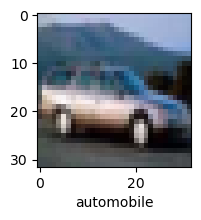

In [11]:
plot_sample(X_train, y_train, 4)

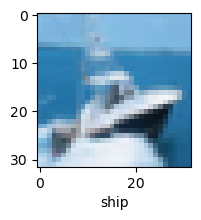

In [12]:
plot_sample(X_train, y_train, 8)

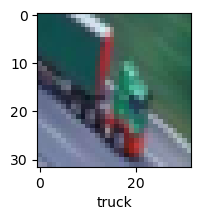

In [13]:
plot_sample(X_train, y_train, 50)

# Normalization 

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\arshi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3901 - loss: 1.6807
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6002 - loss: 1.1377
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6633 - loss: 0.9730
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6939 - loss: 0.8831
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7202 - loss: 0.8056
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7480 - loss: 0.7316
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7674 - loss: 0.6737
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7875 - loss: 0.6214
Epoch 9/10
1540/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7943 - loss: 0.5844

In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7088 - loss: 0.9262


[0.9456068277359009, 0.7016000151634216]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.3228159e-03, 1.4303718e-04, 1.8354901e-04, 8.7335289e-01,
        6.3651428e-04, 9.0567179e-02, 3.3246405e-02, 6.0278580e-06,
        5.1881885e-04, 2.2675687e-05],
       [8.1461085e-06, 6.1593028e-03, 1.5500639e-09, 1.0517761e-06,
        4.5808400e-12, 2.6897104e-10, 2.8908775e-10, 2.5792843e-10,
        9.9382377e-01, 7.7140448e-06],
       [2.3166129e-02, 3.5449587e-02, 6.8150304e-04, 6.5915943e-03,
        1.4145824e-04, 9.9729537e-04, 3.9870781e-04, 6.2095927e-04,
        9.1212624e-01, 1.9826619e-02],
       [9.7212833e-01, 1.5248692e-03, 3.2244774e-03, 2.9652463e-03,
        5.5319439e-03, 1.0483056e-05, 2.4061873e-04, 5.9392996e-04,
        1.1910106e-02, 1.8699302e-03],
       [1.2565521e-07, 4.5049346e-06, 3.8155001e-03, 1.2660900e-02,
        1.0168993e-01, 1.1904271e-04, 8.8169748e-01, 6.8118943e-08,
        1.2459939e-05, 3.9168786e-08]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

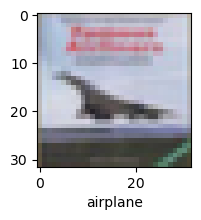

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

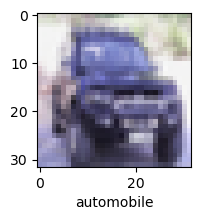

In [24]:
plot_sample(X_test, y_test,9)

In [25]:
classes[y_classes[9]]

'automobile'

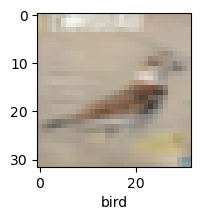

In [28]:
plot_sample(X_test, y_test,70)

In [29]:
classes[y_classes[70]]

'bird'